## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum().sum()
# пропусков нет

0

In [4]:
sum(X.dtypes == 'object')
# категориальных признаков нет

0

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[['alcohol', 'magnesium']])
X_train_transformed = scaler.transform(X_train[['alcohol', 'magnesium']])
X_test_transformed = scaler.transform(X_test[['alcohol', 'magnesium']])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
res = []
classifiers_list = []
values = [1, 3, 5, 10, 15, 25]
for k in values:
    y_train_pred = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train_transformed, y_train).predict(X_train_transformed)
    y_test_pred = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train_transformed, y_train).predict(X_test_transformed)
    classifiers_list.append(KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(X_train_transformed, y_train))
    res.append([k, np.mean(y_train_pred == y_train), np.mean(y_test_pred == y_test)])
df = pd.DataFrame(res, columns = ['NN', 'train accuracy', 'test accuracy'])
df = df.set_index('NN')
df

,train accuracy,test accuracy
NN,,
1,1.000000,0.629630
3,0.870968,0.648148
5,0.862903,0.666667
10,0.766129,0.722222
15,0.741935,0.740741
25,0.741935,0.740741


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
# !pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

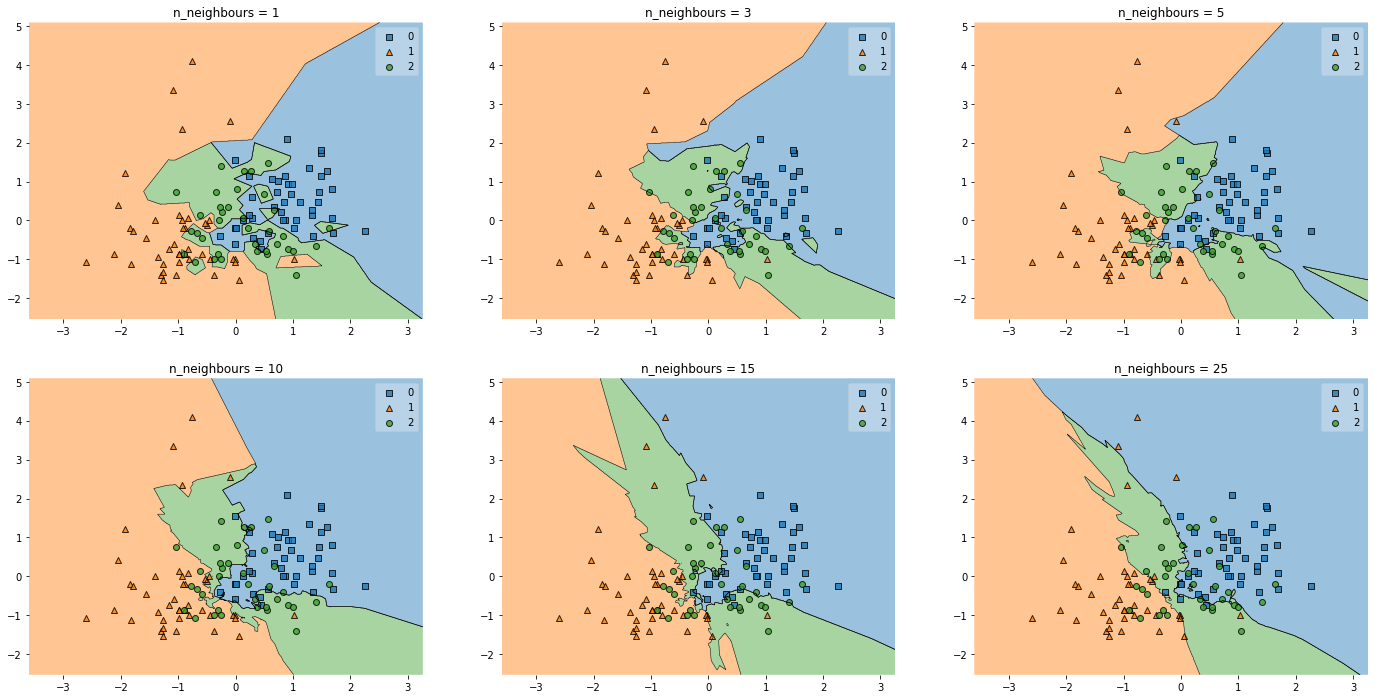

In [10]:
import itertools
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/ - меняла код отсюда (Example 3)
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(24, 12))

for clf, k, grd in zip(classifiers_list,
                         values,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(np.array(X_train_transformed), y_train, clf=clf)
    plt.title(f'n_neighbours = {k}')  

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Самая высокая accuracy наблюдается при k=15 и 25, при k=10 она ниже всего на 2% (при выборе random_state = 20). В целом, значение accuracy варьируется в зависимости от разбиения (если пробовать разные random_state), но как правило наибольшее число правильных ответов на тестовой выборке показывают модели с k=10, 15 или 25. Вообще, точки расположены так, что решающие поверхности провести по ним достаточно сложно (зеленый очень сильно пересекается с соседними областями), это видно и на иллюстрациях: поверхности не гладкие и достаточно хитрые. На мой взгляд, адекватнее всего выглядит модель при k=10, хоть accuracy у нее чуть ниже, чем у моделей с большим k, ее решающая поверхность выглядит весьма неплохо, и, например, оранжевые элементы вверху графика не захватываются областями зеленого/голубого цвета, как в моделях с k=15 и 25.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

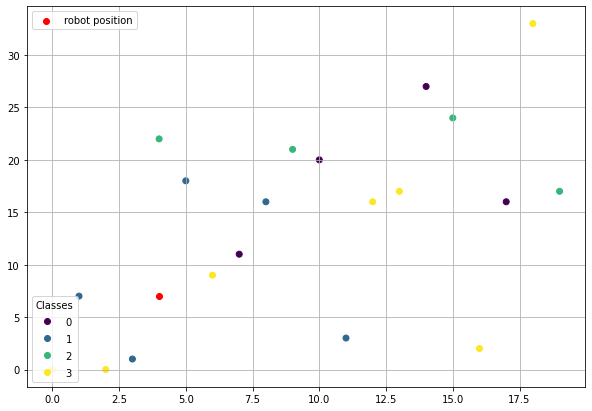

In [11]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])

        # kNN Classifier for determining the classes of landmarks
        self.knn =  KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        pos = self.trajectory[-1]
        v = np.random.binomial(1, 0.2)
        if v == 1:
            new_position = np.array([pos + self.mapping[0]])
        else:
            new_position = np.array([pos + self.mapping[self.knn.predict(np.array([self.trajectory])[-1])[-1]]])   
        self.trajectory = np.vstack([self.trajectory, new_position])



**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [14]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20]), 
                       figsize=(10, 8)): #добавила figsize в входные данные со значением по умолчанию, 
#     чтобы при необходимости можно было задать figsize и красиво/удобно вывести график
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize=figsize)
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

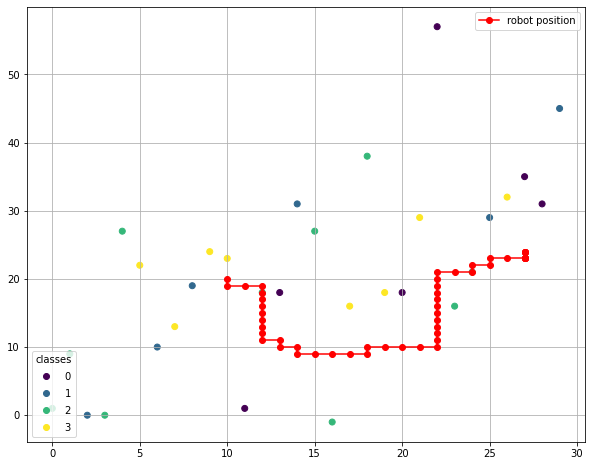

In [15]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

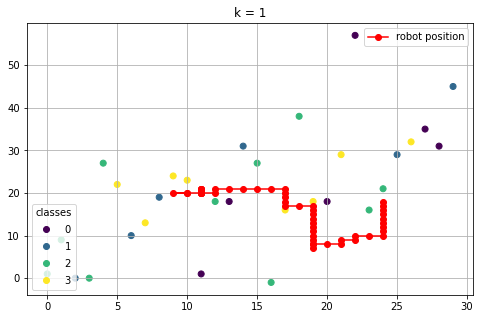

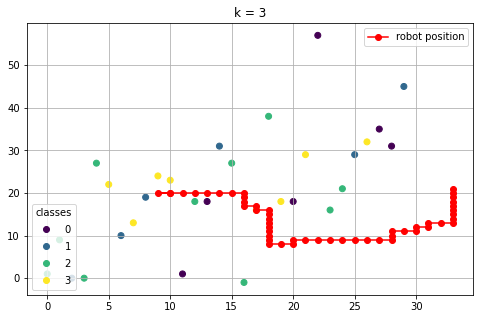

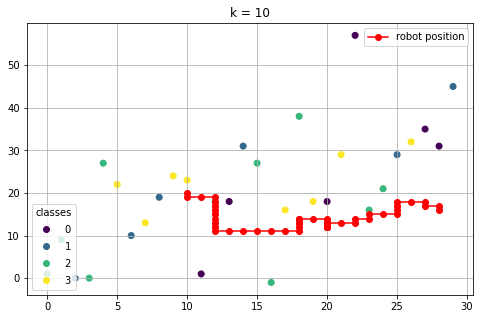

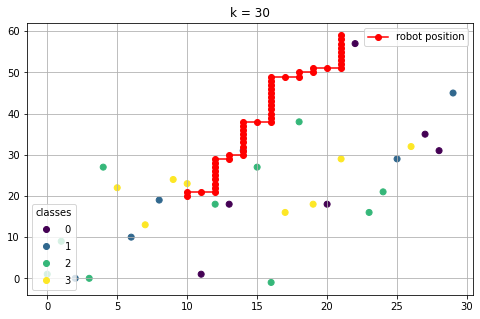

In [16]:
from matplotlib.pyplot import figure

k_list = [1, 3, 10, 30]
for k in k_list:
    conduct_experiment(x, mean = 3, std = 10, k = k, n_movements = 50, figsize=(8, 5))
    plt.title(f'k = {k}')

# если мы выбираем слишком большое k, то робот идет только по 2 направлениям: с вероятностью 20% - вправо, 
# и 80% - в сторону, которую указывает преобладающий класс
# возможно, осмысленное назначение классов меткам позволило бы вести робота по определенной, нужной нам, траектории: 
# например, заславлять робота разворачиваться при приближении к условной границе

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [17]:
data = pd.read_csv('diamonds.csv') # скачала csv, убрала из названия '/data'
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [18]:
data.isna().sum().sum()
# пропущенных значений нет

0

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [19]:
# столбец 'Unnamed: 0' дублирует индексы
data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [20]:
data.dtypes
# видим, что вещественные признаки представлены типами 'float64' и 'int64'

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [21]:
numeric_mask = (data.dtypes == 'float64')|(data.dtypes == 'int64').values
pd.DataFrame(data[data.columns[numeric_mask]].corr()['price'])
# больше всего с ценой коррелирует количество карат, чуть меньше размеры по разным осям

,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


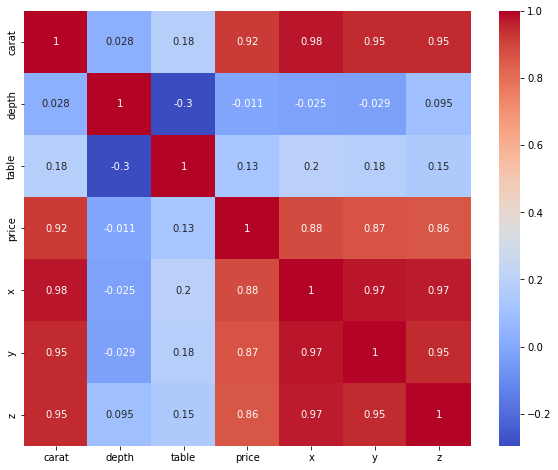

In [22]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm');
# тут можно увидеть, что признаки, которые коррелируют с ценой, также очень сильно коррелированы между собой, 
# особенно значения размеров по осям

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [23]:
cat_mask = (data.dtypes == 'object').values # маска для выбора категориальных признаков
data_encoded = pd.get_dummies(data, columns=data.columns[cat_mask], drop_first=True)
data_encoded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [24]:
# 3 в названиях переменных означает номер задания :)
X_3 = data_encoded.drop('price', axis=1)
y_3 = data_encoded['price']
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=5)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [25]:
scaler_3 = StandardScaler()
scaler_3.fit(X_3_train)
X_3_train_transformed = scaler_3.transform(X_3_train)
X_3_test_transformed = scaler_3.transform(X_3_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [26]:
from sklearn.linear_model import LinearRegression


def MSE(y: np.array, y_pred: np.array):
    return np.square(y_pred - y).mean()


lr = LinearRegression()
lr.fit(X_3_train_transformed, y_3_train)

lr_mse_train = MSE(y=y_3_train, y_pred=lr.predict(X_3_train_transformed))
lr_mse_test = MSE(y=y_3_test, y_pred=lr.predict(X_3_test_transformed))
                                            

print(f'Linear regression (without regularization) train MSE: {lr_mse_train}\n'
      f'Linear regression (without regularization) test MSE: {lr_mse_test}')

Linear regression (without regularization) train MSE: 1276429.6776365407
Linear regression (without regularization) test MSE: 1277672.600084532


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [27]:
pd.DataFrame(lr.coef_, index=X_3.columns, columns=['coefs'])

,coefs
carat,5336.024293
depth,-88.636842
table,-54.700049
x,-1091.574312
y,2.362277
z,-52.419518
cut_Good,177.080028
cut_Ideal,427.257529
cut_Premium,344.385600
cut_Very Good,313.377099


In [28]:
pd.DataFrame(abs(lr.coef_), index=X_3.columns, columns=['coefs']).sort_values(by='coefs', ascending=False)[:10]
# Переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных:
# количество карат - 'carat'
# размер по x - 'x'
# различные значения clarity (изначально это категориальная переменная, но после one-hot 
# encoding каждая из них стала вещественной)
# также J color из всех цветов имеет самый большой вес

,coefs
carat,5336.024293
clarity_VS2,1783.302236
clarity_VS1,1639.475494
clarity_SI1,1567.636880
clarity_VVS2,1448.065999
clarity_VVS1,1250.520016
x,1091.574312
clarity_SI2,1014.170256
clarity_IF,958.868084
color_J,520.415834


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ridge = Ridge(10).fit(X_3_train_transformed, y_3_train)
lasso = Lasso(10).fit(X_3_train_transformed, y_3_train)

r_mse_train = ridge.predict(X_3_train_transformed)
r_mse_test =  ridge.predict(X_3_test_transformed)
l_mse_train = lasso.predict(X_3_train_transformed)
l_mse_test = lasso.predict(X_3_test_transformed)

print (f'Linear regression (without regularization) train MSE: {lr_mse_train}\n'
      f'Linear regression (without regularization) test MSE: {lr_mse_test}\n'
       f'Ridge train MSE: {MSE(y_3_train, r_mse_train )}\n'
       f'Ridge test MSE: {MSE(y_3_test, r_mse_test)}\n'
       f'Lasso train MSE: {MSE(y_3_train, l_mse_train)}\n'
       f'Lasso test MSE: {MSE(y_3_test, l_mse_test)}\n')

pd.set_option('display.max_columns', None)
pd.DataFrame([lr.coef_, ridge.coef_, lasso.coef_], columns=X_3.columns, index=['lr', 'ridge', 'lasso'])

# регрессии с регуляризацией не уменьшили ошибку, коэффициенты поменялись незначительно при ridge-регрессии 
# (нет изменений даже на порядок), впрочем, это видно и по тому, что ошибка осталась практически такой же 
# (очень немного выросла)
# Lasso-регрессия действовала несколько более заметно, могла уменьшить некоторые коэффициенты в 2 раза 
# (cut_ideal, cut_very good, clarity_SI2 etc.) или занулить вовсе (y, color_E), однако MSE от этого только выросла
# несмотря на то, что были очень коррелированные между собой признаки, проблема мультиколлинеарности не сильно проявлялась 
# в изначальной регрессии: видно, что коэффициенты у y и z, которые очень сильно коррелируют с x и между собой, 
# очень незначительные, также видимо коэффициенты остальных признаков не настолько велики, чтобы возникла необходимость 
# в регуляризации

Linear regression (without regularization) train MSE: 1276429.6776365407
Linear regression (without regularization) test MSE: 1277672.600084532
Ridge train MSE: 1276554.1265018545
Ridge test MSE: 1278067.7741531297
Lasso train MSE: 1334258.0704926166
Lasso test MSE: 1332832.8949126306



,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
lr,5336.024293,-88.636842,-54.700049,-1091.574312,2.362277,-52.419518,177.080028,427.257529,344.385600,313.377099,-69.493365,-96.725303,-187.871675,-344.255358,-440.766227,-520.415834,958.868084,1567.636880,1014.170256,1639.475494,1783.302236,1250.520016,1448.065999
ridge,5297.843150,-85.451953,-54.887982,-1040.423161,1.709088,-66.796423,177.711086,428.575781,345.431678,314.868808,-69.121488,-96.547807,-187.367301,-343.368034,-439.507729,-519.128914,947.083427,1538.932435,989.632862,1615.430794,1755.511256,1234.251903,1428.739424
lasso,4851.689775,-93.738946,-64.992595,-643.279125,-0.000000,-58.426105,54.276556,226.984799,161.551680,147.317846,-0.000000,-30.903909,-111.464168,-271.284550,-370.232058,-461.825143,656.226622,869.001291,405.419938,1046.689113,1101.948229,838.194359,965.902165


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

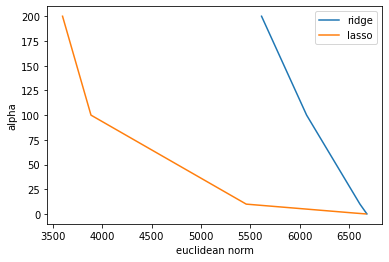

In [30]:
y = [0.1, 1, 10, 100, 200]
x_ridge = [np.linalg.norm(Ridge(elem).fit(X_3_train_transformed, y_3_train).coef_) for elem in y]
x_lasso = [np.linalg.norm(Lasso(elem).fit(X_3_train_transformed, y_3_train).coef_) for elem in y]

plt.plot(x_ridge, y, label='ridge')
plt.plot(x_lasso, y, label='lasso')
plt.legend()
plt.xlabel('euclidean norm')
plt.ylabel('alpha')
plt.show()

# lasso-регрессия агрессивнее уменьшает веса: видно, что при альфа от 10 до 200 эвклидова норма 
# значительно меньше у lasso-модели. lasso-регрессию используют для отбора признаков, т.к. она может обращать
# коэффициенты признаков в 0, т.к. в формуле регуляризатора используются модули

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [31]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, alphas = y).fit(X_3_train_transformed, y_3_train)
cv_df = pd.DataFrame(reg.mse_path_, index=reg.alphas_)
cv_df['Mean'] = cv_df.mean(axis=1)
alpha = cv_df['Mean'].idxmin()
print(f'The best alpha is {alpha}')
cv_df

The best alpha is 1.0


,0,1,2,3,4,Mean
200.0,2.245146e+06,2.010388e+06,2.248986e+06,2.153826e+06,2.174421e+06,2.166554e+06
100.0,1.865740e+06,1.673953e+06,1.869760e+06,1.782264e+06,1.783971e+06,1.795138e+06
10.0,1.405462e+06,1.269233e+06,1.370461e+06,1.336063e+06,1.305992e+06,1.337442e+06
1.0,1.342678e+06,1.212112e+06,1.308073e+06,1.279832e+06,1.261978e+06,1.280935e+06
0.1,1.341081e+06,1.211172e+06,1.307934e+06,1.284569e+06,1.263399e+06,1.281631e+06


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [32]:
lasso_reg = Lasso(alpha).fit(X_3_train_transformed, y_3_train)
l_df = pd.DataFrame(lasso_reg.coef_, index=X_3.columns, columns = ['coef'])
l_df

,coef
carat,5289.140055
depth,-89.829333
table,-55.732200
x,-1050.985508
y,-0.000000
z,-48.273638
cut_Good,164.925844
cut_Ideal,407.431445
cut_Premium,326.280402
cut_Very Good,296.927888


In [33]:
l_df.loc[abs(l_df['coef']).sort_values(ascending=False)[:10].index]
# самые информативные признаки - количество карат, размер по оси x и значения категориального признака clarity. 
# также значение J категориального признака color вносит больший вклад, чем любой другой цвет

,coef
carat,5289.140055
clarity_VS2,1714.336677
clarity_VS1,1579.479961
clarity_SI1,1496.938271
clarity_VVS2,1399.242427
clarity_VVS1,1208.747762
x,-1050.985508
clarity_SI2,952.564295
clarity_IF,928.202728
color_J,-514.561762


In [34]:
l_df.loc[abs(l_df['coef']).sort_values(ascending=False)[10:].index]
# самый неинформативные признаки - color, cut, depth, table, 
# а также значения размеров по осям z и y (т.к. они значительно связаны с x, а у этого признака уже большой коэффициент)

,coef
color_I,-433.704532
cut_Ideal,407.431445
color_H,-336.929569
cut_Premium,326.280402
cut_Very Good,296.927888
color_G,-180.184985
cut_Good,164.925844
color_F,-90.099300
depth,-89.829333
color_E,-62.491855


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [35]:
print(f'Linear regression (without regularization) test MSE: {lr_mse_test}\n'
    f'Lasso (alpha={alpha}) test MSE: {MSE(y_3_test, lasso_reg.predict(X_3_test_transformed))}')
# регуляризация незначительно повлияла на величину средней квадратичной ошибки, даже увеличила ее. значит, 
# исходная модель не нуждалась в регуляризации, с коэффициентами все было ок, не было экстремально больших весов, 
# за которые следовало бы штрафовать, поэтому для этих данных подходит обычная линейная регрессия

Linear regression (without regularization) test MSE: 1277672.600084532
Lasso (alpha=1.0) test MSE: 1278470.911586354
